# Explore here

# Day one


In [1]:
import os 

archivo_csv = 'data/raw/dataraw.csv'
#ruta relativa del archivo CSV
ruta_completa = os.path.abspath(archivo_csv)

print("Ruta completa del archivo CSV:", ruta_completa)

Ruta completa del archivo CSV: /workspaces/eda-repository-/src/data/raw/dataraw.csv


In [2]:
import pandas as pd
data_table = pd.read_csv('/workspaces/eda-repository-/data/raw/dataraw.csv') #ruta absoluta
#data_table = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')

data_table.head(7)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0


In [3]:
data_table.shape
#da información sobre la estructura de mi dataframe

(48895, 16)

In [4]:
data_table.info()
#da descripción concisa de la información sobre dataFrame: tipo de datos de cada columna, cantidad de valores no nulos y el uso de memoria

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
data_table = data_table.drop_duplicates(subset = data_table.columns.difference(['host_id']))
print(data_table.shape)
data_table.head()

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


No se encuentran duplicados en este dataset. Haremos la misma prueba con el dataset nuevo sin las columnas que no sean de interés.

**Se verifica que no hay ninguna fila duplicada**

In [6]:
if data_table.duplicated().sum():
    data_table = data_table.drop_duplicates()
print(data_table.shape)
data_table.head(3)

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


En la siguiente línea de código, elimino información no relevante para el análisis del dataset, guardándolo en una nueva variable

In [8]:
dt_nio = data_table.drop(['id', 'host_name', 'name', 'last_review', 'neighbourhood', 'host_id'], axis = 1)
dt_nio.info()

#host_name, name, last_review, neighbourhood, host_id, id fuera
#hay mas 10000 valores nulos en last_review y reviews_per_month

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   latitude                        48895 non-null  float64
 2   longitude                       48895 non-null  float64
 3   room_type                       48895 non-null  object 
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               38843 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 3.7+ MB


No se encuentran duplicados en este dataset, después de eliminar las columnas que no son de interés

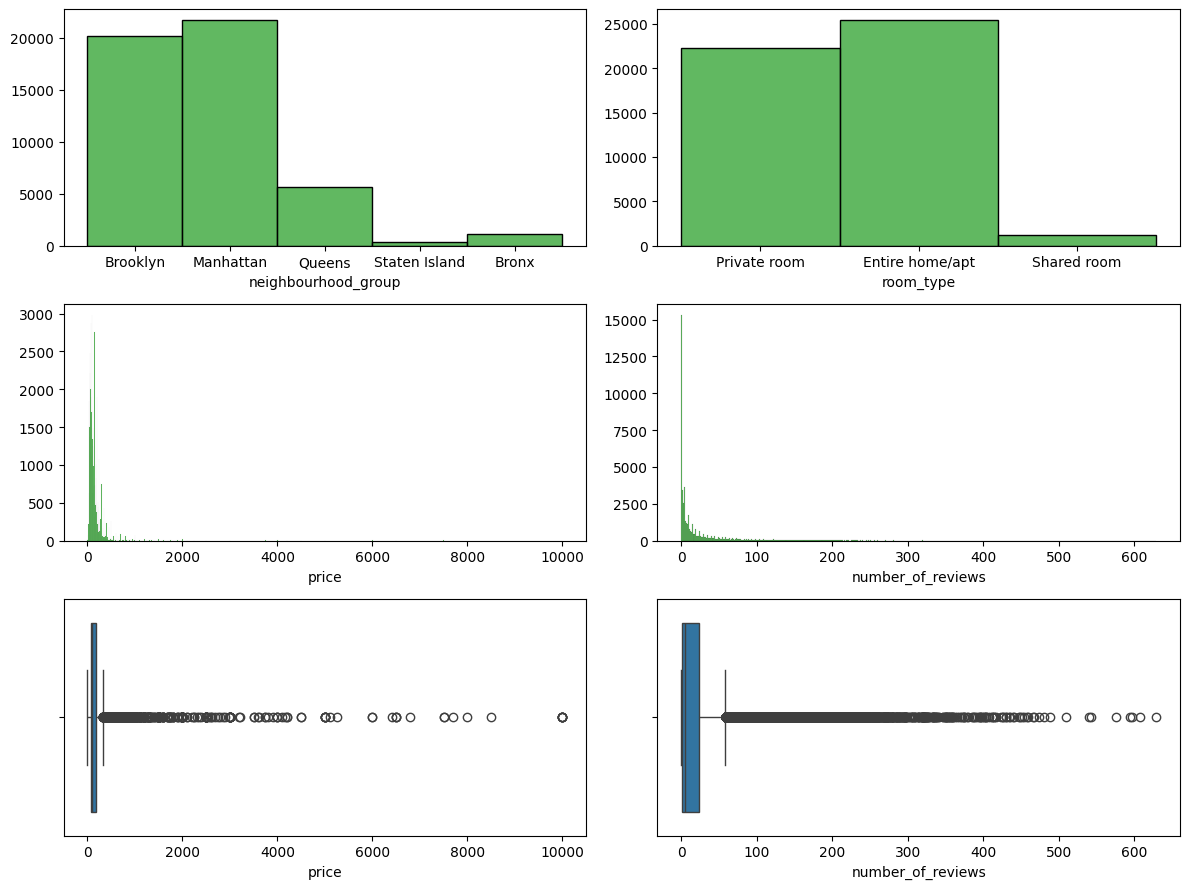

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(3, 2, figsize = (12, 9))
#sns.set(style="white")
sns.histplot(ax = axis[0, 0], data= dt_nio, x = 'neighbourhood_group', color = 'C2').set(ylabel = None)
sns.histplot(ax = axis[0, 1], data= dt_nio, x = 'room_type', color = 'C2').set(ylabel = None)
sns.histplot(ax = axis[1, 0], data= dt_nio, x = 'price', color = 'C2').set(ylabel = None)
sns.boxplot(ax = axis[2, 0], data = dt_nio, x = 'price')
sns.histplot(ax = axis[1, 1], data= dt_nio, x = 'number_of_reviews', color = 'C2').set(ylabel = None)
sns.boxplot(ax = axis[2, 1], data = dt_nio, x = 'number_of_reviews')

plt.tight_layout()
plt.show()

# COMENTA ALGO GUARRA

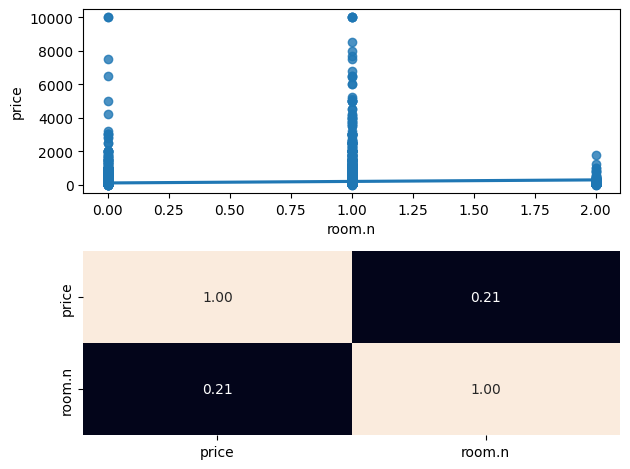

In [10]:
dt_nio['room.n'] = pd.factorize(dt_nio["room_type"])[0]

fig, axis = plt.subplots(2, 1)

sns.regplot(data = dt_nio, x = "room.n", y = "price", ax = axis[0])
sns.heatmap(dt_nio[["price", "room.n"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

plt.tight_layout()
plt.show()

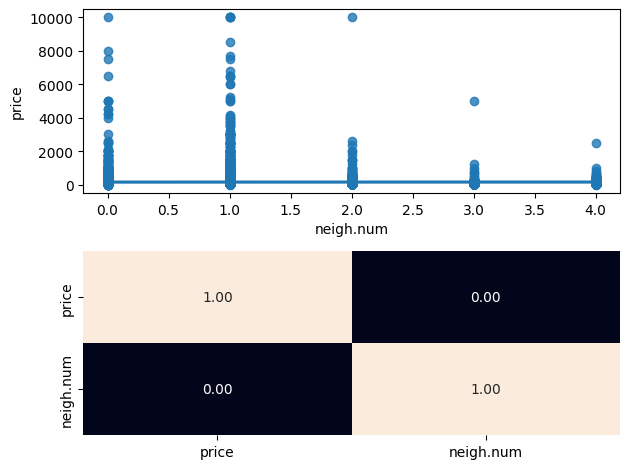

In [11]:
dt_nio['neigh.num'] = pd.factorize(dt_nio['neighbourhood_group'])[0]

fig, axis = plt.subplots(2, 1)

sns.regplot(data = dt_nio, x = "neigh.num", y = 'price', ax = axis[0])
sns.heatmap(dt_nio[["price", "neigh.num"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar=False)

plt.tight_layout()
plt.show()

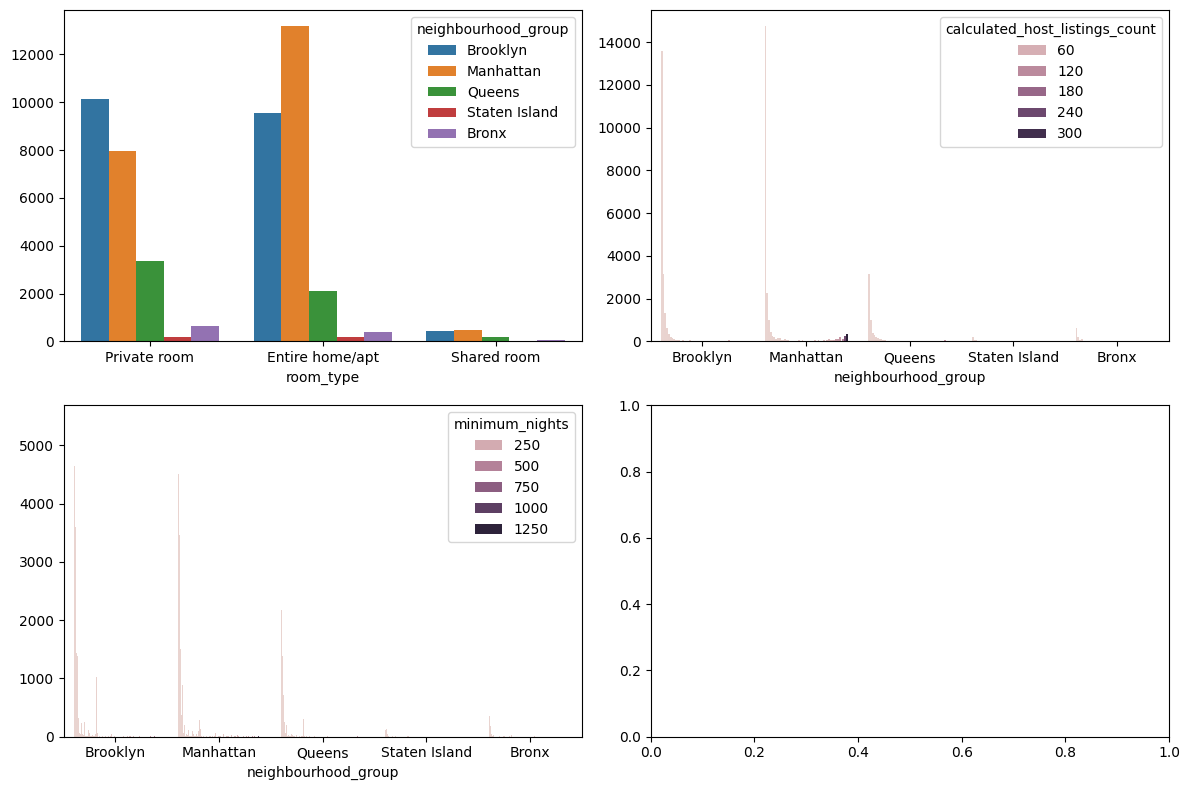

In [12]:
fig, axis = plt.subplots(2, 2, figsize = (12, 8))

sns.countplot(ax = axis[0, 0], data = dt_nio, x = "room_type", hue = 'neighbourhood_group').set(ylabel = None)
sns.countplot(ax = axis[1, 0], data= dt_nio, x='neighbourhood_group', hue='minimum_nights').set(ylabel = None)
sns.countplot(ax = axis[0, 1], data = dt_nio, x = 'neighbourhood_group', hue = 'calculated_host_listings_count').set(ylabel = None)

plt.tight_layout()

plt.show()

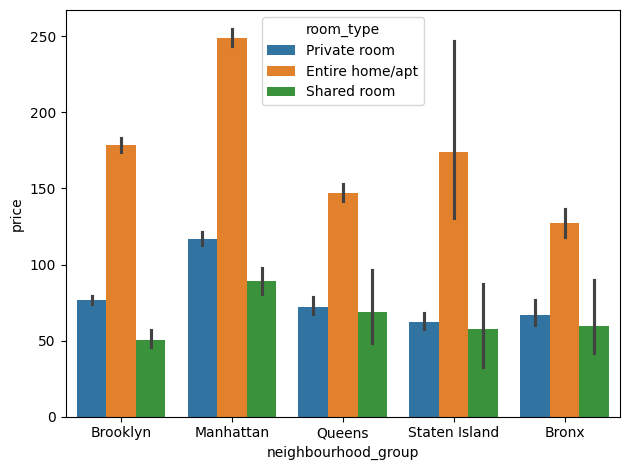

In [13]:
sns.barplot( data = dt_nio, x = 'neighbourhood_group', y = 'price', hue = 'room_type')

plt.tight_layout()

plt.show()

# hacer comentario de las graficas de encima

<Axes: >

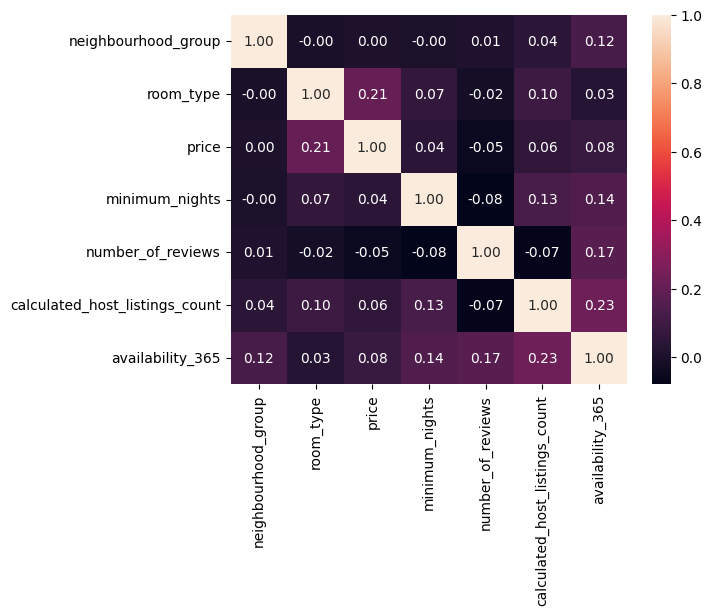

In [14]:
t_cols = ['neighbourhood_group', 'room_type']

#Iterar sobre las columnas y aplicar pd.factorize
for col in t_cols:
    dt_nio[col] = pd.factorize(dt_nio[col])[0]

sns.heatmap(dt_nio[['neighbourhood_group', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']].corr(), annot= True, fmt= '.2f')

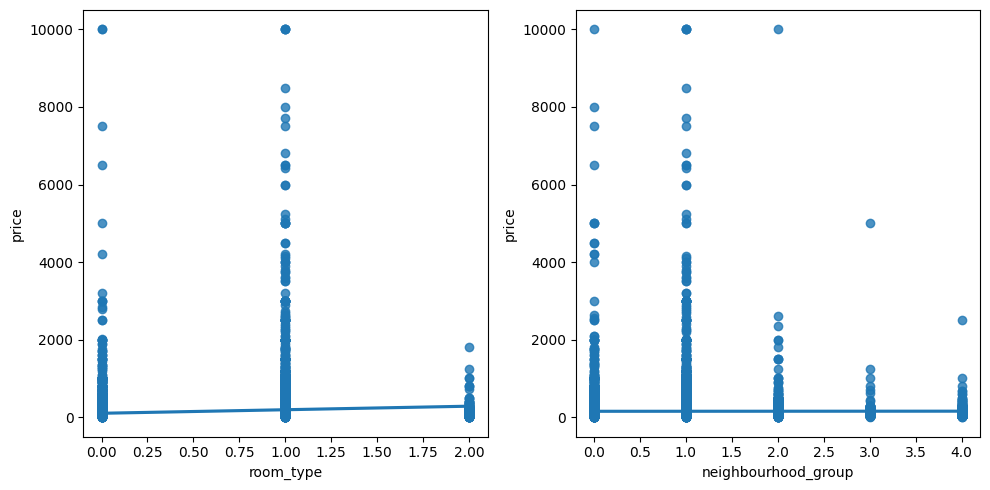

In [15]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.regplot(ax = axis[0], data = dt_nio, x = 'room_type', y = 'price')
sns.regplot(ax = axis[1], data = dt_nio, x = 'neighbourhood_group', y = 'price')

plt.tight_layout()

plt.show()

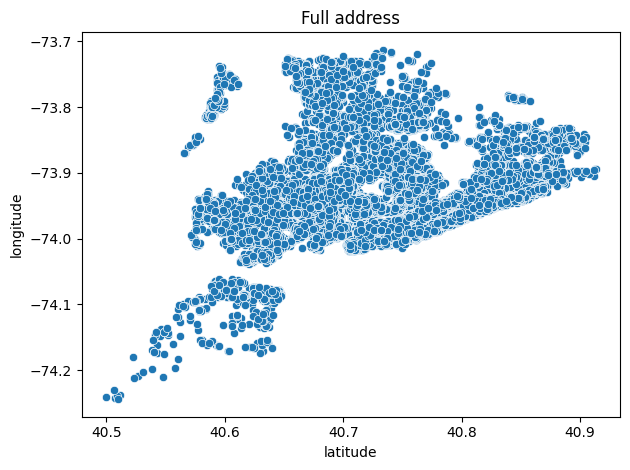

In [16]:
sns.scatterplot(x = dt_nio['latitude'], y = dt_nio['longitude'])
plt.title('Full address')
plt.xlabel('latitude')
plt.ylabel('longitude')

plt.tight_layout()
plt.show()

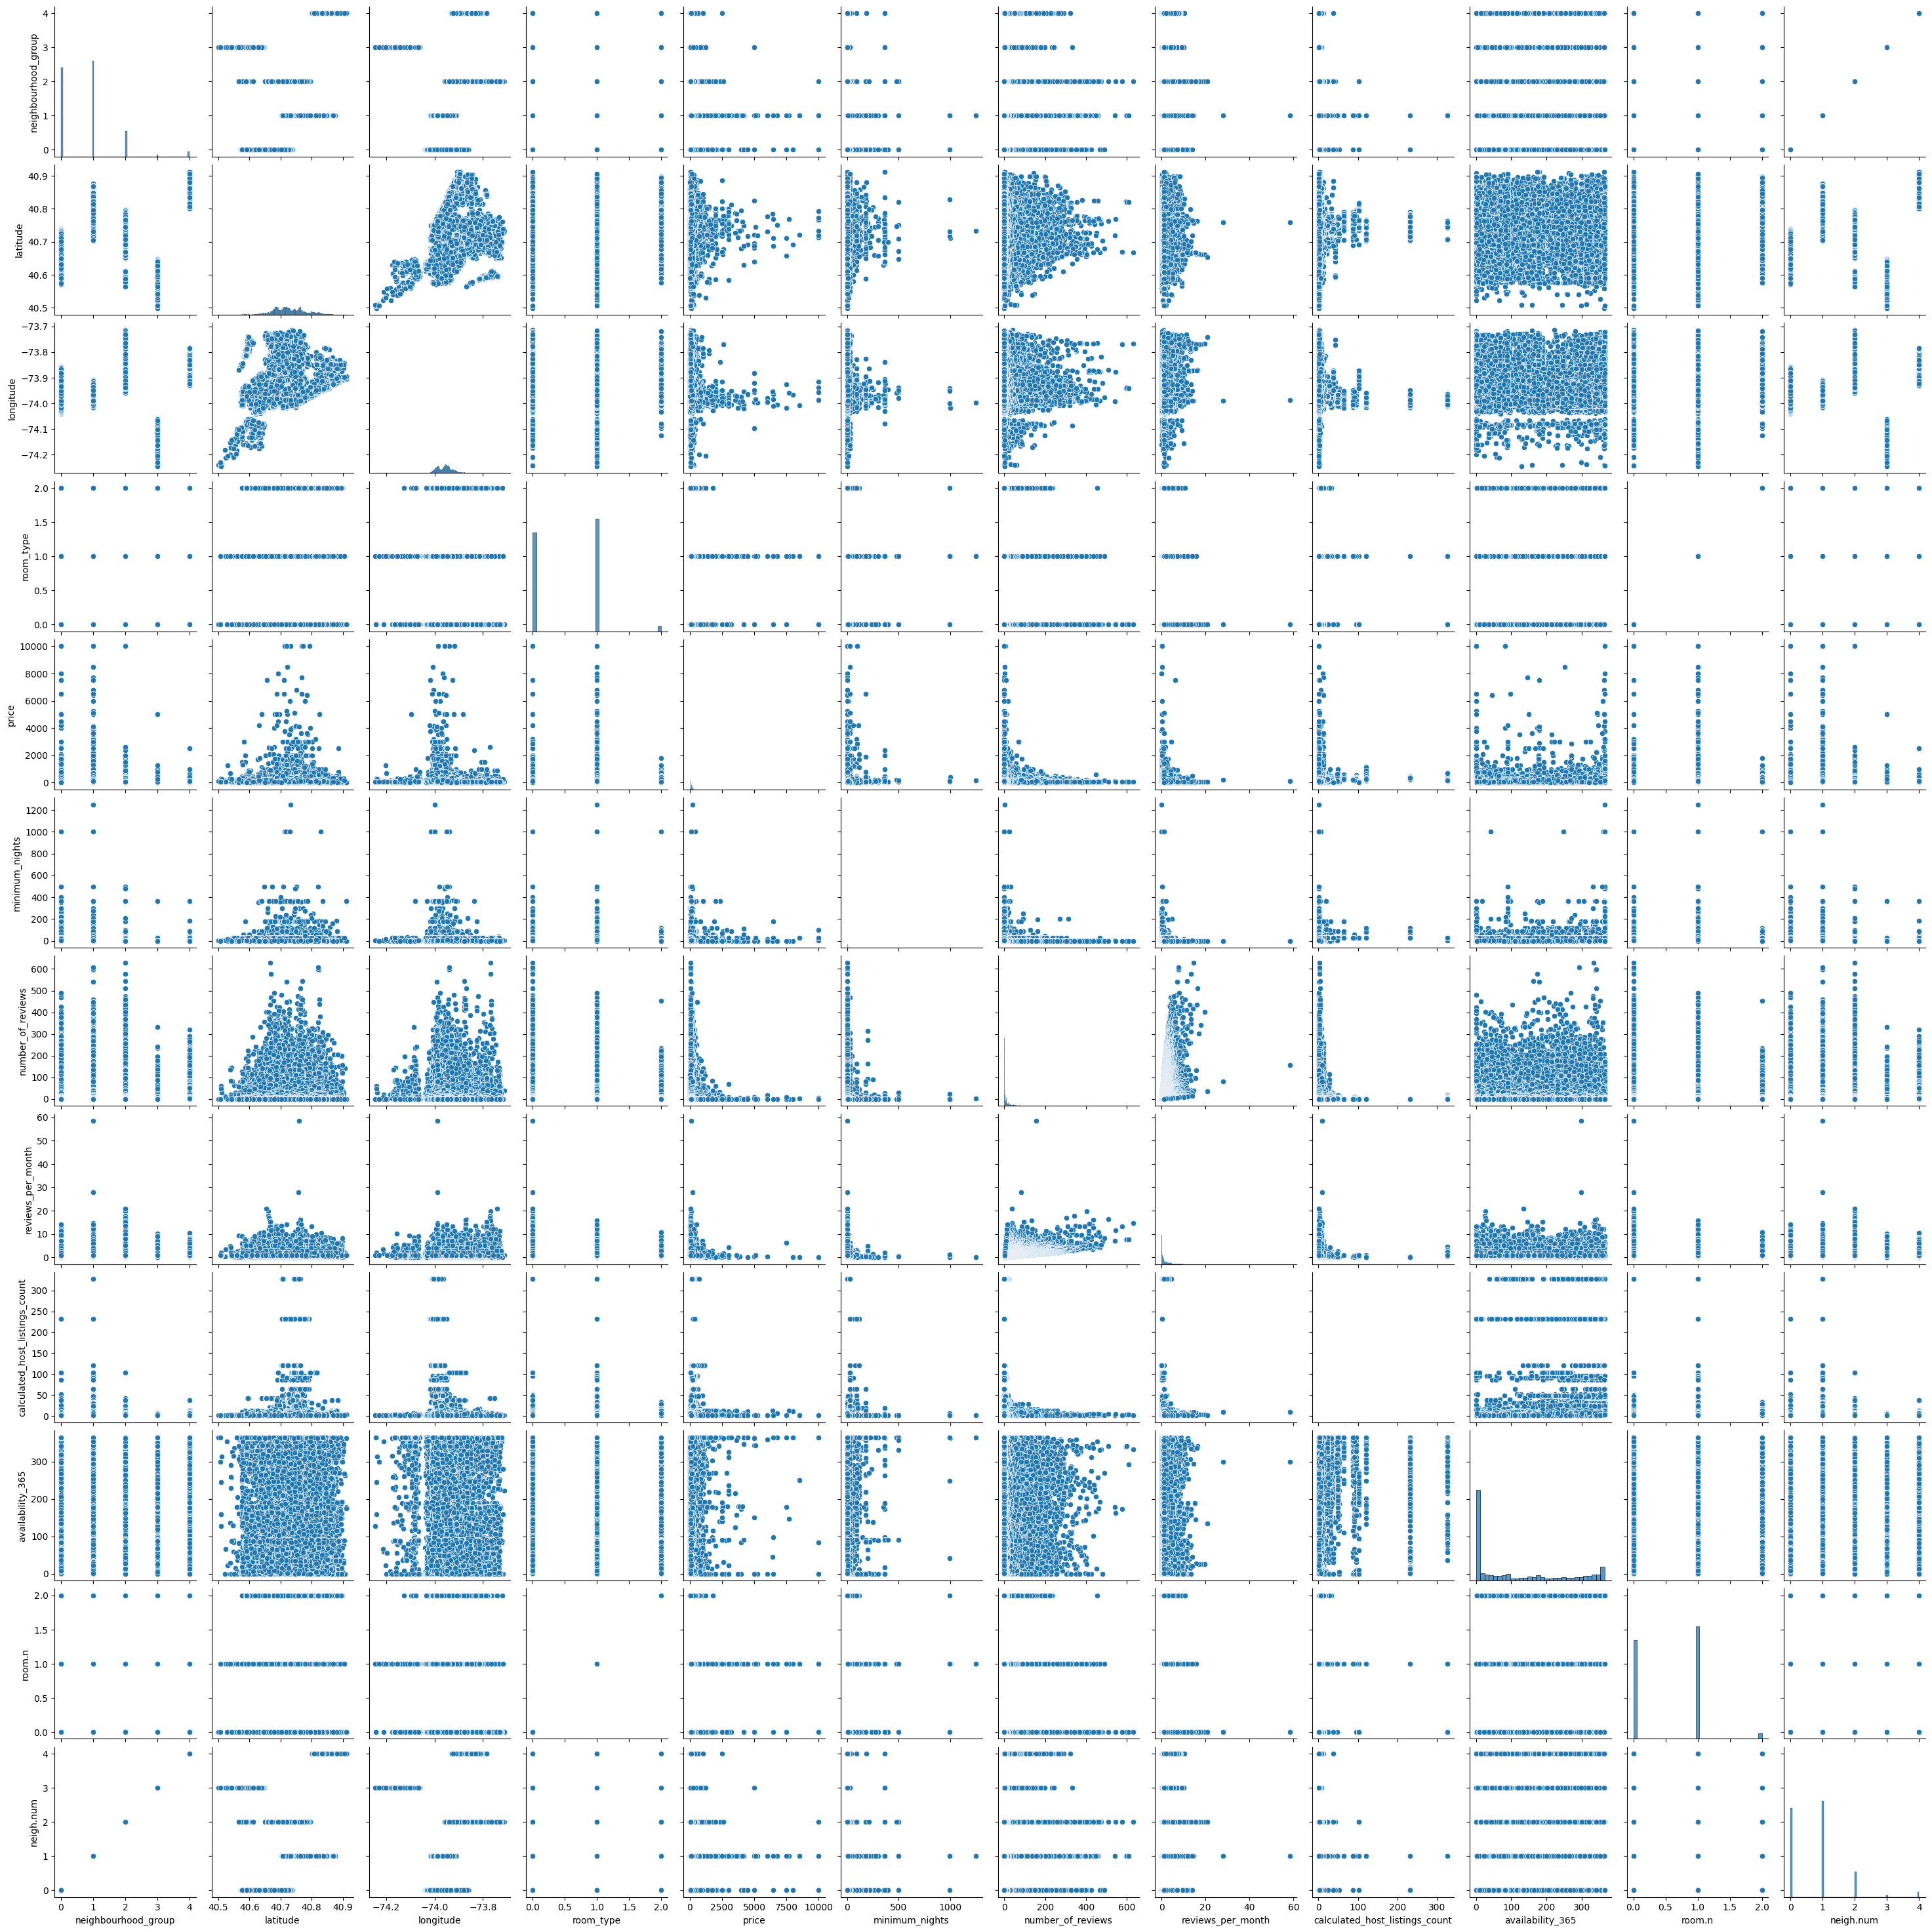

In [19]:
sns.pairplot(data = dt_nio)

# Day two

In [17]:
dt_nio.describe()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room.n,neigh.num
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,0.786911,40.728949,-73.952170,0.567113,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327,0.567113,0.786911
std,0.844386,0.054530,0.046157,0.541249,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289,0.541249,0.844386
min,0.000000,40.499790,-74.244420,0.000000,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,40.690100,-73.983070,0.000000,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,40.723070,-73.955680,1.000000,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000,1.000000,1.000000
75%,1.000000,40.763115,-73.936275,1.000000,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000,1.000000,1.000000
max,4.000000,40.913060,-73.712990,2.000000,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,2.000000,4.000000


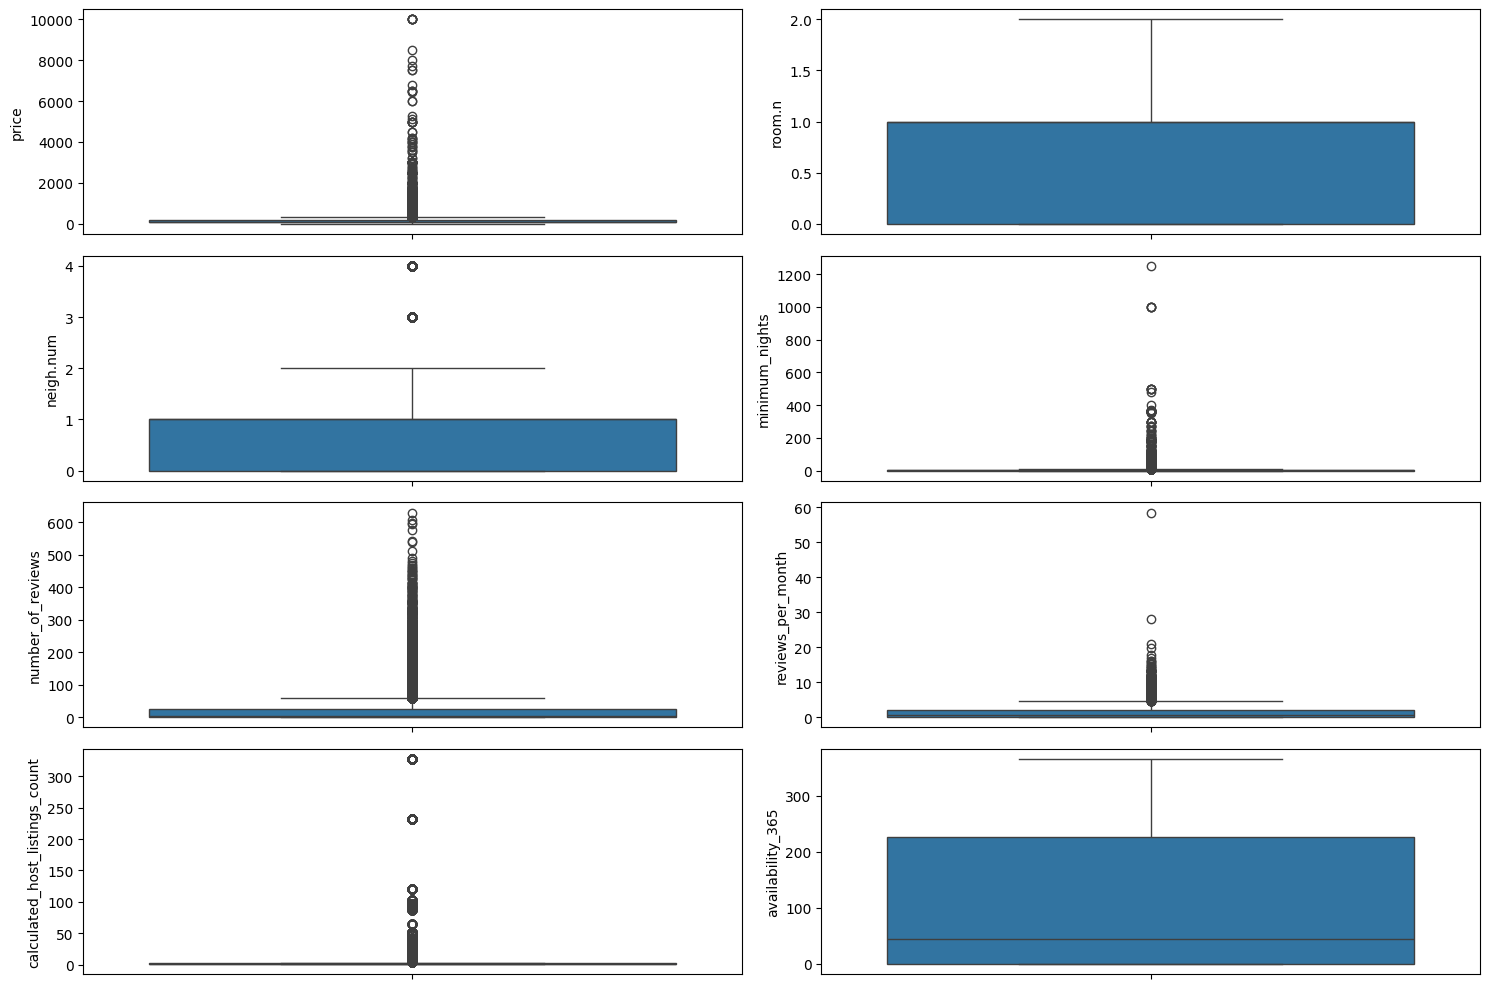

In [18]:
fig, axis= plt.subplots(4, 2, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = dt_nio, y= 'price')
sns.boxplot(ax = axis[0, 1], data = dt_nio, y= 'room.n')
sns.boxplot(ax = axis[1, 0], data = dt_nio, y= 'neigh.num')
sns.boxplot(ax= axis [1, 1], data= dt_nio, y= 'minimum_nights')
sns.boxplot(ax= axis[2, 0], data= dt_nio, y= 'number_of_reviews')
sns.boxplot(ax= axis[2, 1], data= dt_nio, y= 'reviews_per_month')
sns.boxplot(ax= axis[3, 0], data= dt_nio, y= 'calculated_host_listings_count')
sns.boxplot(ax= axis[3, 1], data= dt_nio, y= 'availability_365')
plt.tight_layout()

plt.show()

In [19]:
price_sts = dt_nio["price"].describe()
price_sts

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [20]:
price_itval = price_sts['75%'] - price_sts['25%']
upper_limit = price_sts['75%'] + 1.5 * price_itval
lower_limit = price_sts['25%'] - 1.5 * price_itval
print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(price_itval, 2)}")

The upper and lower limits for finding outliers are 334.0 and -90.0, with an interquartile range of 106.0


In [25]:
dt_nio[(dt_nio['price'] > 500)]

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room.n,neigh.num
85,0,40.69723,-73.99268,1,800,1,25,0.24,1,7,1,0
299,1,40.71943,-73.99627,1,575,2,191,1.88,1,298,1,1
345,0,40.68613,-73.96536,1,650,5,0,NaN,3,365,1,0
365,0,40.73861,-73.95485,0,599,3,9,0.09,28,60,0,0
496,1,40.77350,-73.98697,1,2000,30,30,0.33,11,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
48535,0,40.68245,-73.93417,1,1749,1,0,NaN,1,303,1,0
48697,1,40.77665,-73.98867,1,750,4,0,NaN,1,174,1,1
48740,0,40.69827,-73.99649,1,550,3,1,1.00,1,230,1,0
48757,1,40.71815,-74.01145,1,700,3,0,NaN,1,37,1,1


In [26]:
dt_nio[(dt_nio['price'] > 800) & (dt_nio['minimum_nights'] == 2)]

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room.n,neigh.num
2772,1,40.73051,-73.99518,1,1100,2,17,0.25,2,364,1,1
3732,1,40.74422,-73.97822,1,1550,2,0,NaN,1,0,1,1
3761,0,40.57645,-74.01065,1,1485,2,6,0.24,1,260,1,0
3817,1,40.76096,-73.98646,1,975,2,1,0.02,1,0,1,1
5432,0,40.68450,-73.91193,1,1000,2,0,NaN,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
46337,2,40.59636,-73.74130,1,900,2,0,NaN,5,365,1,2
46850,1,40.74501,-73.97774,1,900,2,0,NaN,1,245,1,1
47670,0,40.67580,-73.95091,1,1500,2,0,NaN,7,267,1,0
48050,1,40.73971,-73.99611,1,1050,2,0,NaN,1,365,1,1


In [27]:
dt_nio.isnull().sum().sort_values(ascending=False)

reviews_per_month                 10052
neighbourhood_group                   0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
room.n                                0
neigh.num                             0
dtype: int64

**En la columna 'reviews_per_month' se ve que hay un total de 10052 valores nulos.**

In [28]:
dt_nio.isnull().sum().sort_values(ascending=False)/len(dt_nio)

reviews_per_month                 0.205583
neighbourhood_group               0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
room.n                            0.000000
neigh.num                         0.000000
dtype: float64

In [29]:
dt_nio["reviews_per_month"].fillna(dt_nio["reviews_per_month"].median(), inplace = True)
dt_nio.isnull().sum()

neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
room.n                            0
neigh.num                         0
dtype: int64

**Después de esto, se tendria que buscar las columnas que sean susceptibles de poder ser agrupadas (por ser del mismo tipo, aunque más segregadas) para simplificar el df.**
**Se comprueba que no hay columnas que puedan unificarse, así que no se hace**

**Para hacer escalado de datos, se puede hacer una normalización o un min-max sobre estos (los datos negativos no se pueden escalar, se tiene que usar min-max)**

In [38]:
#Min - max data
from sklearn.preprocessing import MinMaxScaler

name_column = ['neighbourhood_group','room_type', 'latitude', 'longitude', 'minimum_nights', 'availability_365']

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(dt_nio[name_column])
dt_nio_scal = pd.DataFrame(scal_features, index = dt_nio.index, columns = name_column)
dt_nio_scal['price'] = dt_nio['price']
dt_nio_scal.head()

,neighbourhood_group,room_type,latitude,longitude,minimum_nights,availability_365,price
0,0.00,0.0,0.357393,0.511921,0.000000,1.000000,149
1,0.25,0.5,0.614199,0.490469,0.000000,0.972603,225
2,0.25,0.0,0.748252,0.569257,0.001601,1.000000,150
3,0.00,0.5,0.448496,0.535649,0.000000,0.531507,89
4,0.25,0.5,0.722820,0.565324,0.007206,0.000000,80


# Day three

In [39]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = dt_nio_scal.drop('price', axis = 1)
y = dt_nio_scal['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


selection_model = SelectKBest(chi2, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,neighbourhood_group,room_type,longitude,minimum_nights,availability_365
0,0.00,0.5,0.544042,0.001601,0.002740
1,0.25,0.0,0.571929,0.000801,0.000000
2,0.00,0.0,0.536195,0.000801,0.000000
3,0.00,0.5,0.589429,0.001601,0.731507
4,0.50,0.0,0.656305,0.003203,0.000000
